In [1]:
!pip install mlxtend

In [2]:
import pandas as pd
import numpy as np
import mlxtend
from mlxtend.frequent_patterns import apriori, association_rules
import matplotlib.pyplot as plt
%matplotlib inline

In [10]:
df = pd.read_csv('retail_dataset.csv', sep=',') 
## Print top 5 rows 
df.head(5)

,0,1,2,3,4,5,6
0,Bread,Wine,Eggs,Meat,Cheese,Pencil,Diaper
1,Bread,Cheese,Meat,Diaper,Wine,Milk,Pencil
2,Cheese,Meat,Eggs,Milk,Wine,NaN,NaN
3,Cheese,Meat,Eggs,Milk,Wine,NaN,NaN
4,Meat,Pencil,Wine,NaN,NaN,NaN,NaN


In [11]:
items = (df['0'].unique())
items

array(['Bread', 'Cheese', 'Meat', 'Eggs', 'Wine', 'Bagel', 'Pencil',
       'Diaper', 'Milk'], dtype=object)

To make use of the apriori module given by mlxtend library, we need to convert the dataset according to it’s liking. apriori module requires a dataframe that has either 0 and 1 or True and False as data. The data we have is all string (name of items), we need to One Hot Encode the data.

Custom One Hot Encoding

In [15]:
encoded_vals = []
#def custom():
for index, row in df.iterrows():
    labels = {}
    uncommons = list(set(items) - set(row))
    commons = list(set(items).intersection(row))
    for uc in uncommons:
        labels[uc] = 0
    for com in commons:
        labels[com] = 1
    encoded_vals.append(labels)
encoded_vals[0]
ohe_df = pd.DataFrame(encoded_vals)

`apriori(df, min_support=0.5, use_colnames=False, max_len=None, verbose=0, low_memory=False)`

* `df` : One-Hot-Encoded DataFrame or DataFrame that has 0 and 1 or True and False as values
* `min_support` : Floating point value between 0 and 1 that indicates the minimum support required for an itemset to be selected. (number of observation with item / total observations)
* `use_colnames` : This allows to preserve column names for itemset making it more readable.
* `max_len` : Max length of itemset generated. If not set, all possible lengths are evaluated.
* `verbose` : Shows the number of iterations if >= 1 and low_memory is True. If =1 and low_memory is False , shows the number of combinations.
* `low_memory` : If True, uses an iterator to search for combinations above min_support. Note that while low_memory=True should only be used for large dataset if memory resources are limited, because this implementation is approx. 3–6x slower than the default.

In [16]:
freq_items = apriori(ohe_df, min_support=0.2, use_colnames=True, verbose=1)
freq_items.head(7)

Processing 4 combinations | Sampling itemset size 4


,support,itemsets
0,0.501587,(Milk)
1,0.425397,(Bagel)
2,0.476190,(Meat)
3,0.501587,(Cheese)
4,0.361905,(Pencil)
5,0.438095,(Eggs)
6,0.438095,(Wine)


In [17]:
rules = association_rules(freq_items, metric="confidence", min_threshold=0.6)
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Cheese),(Milk),0.501587,0.501587,0.304762,0.607595,1.211344,0.053172,1.270148
1,(Milk),(Cheese),0.501587,0.501587,0.304762,0.607595,1.211344,0.053172,1.270148
2,(Bagel),(Bread),0.425397,0.504762,0.279365,0.656716,1.301042,0.064641,1.442650
3,(Cheese),(Meat),0.501587,0.476190,0.323810,0.645570,1.355696,0.084958,1.477891
4,(Meat),(Cheese),0.476190,0.501587,0.323810,0.680000,1.355696,0.084958,1.557540


## Visualizing results
### Support vs Confidence

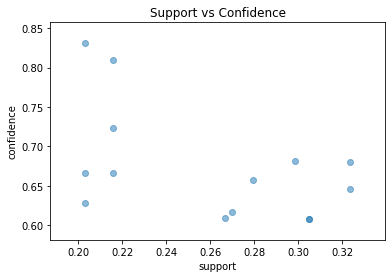

In [18]:
plt.scatter(rules['support'], rules['confidence'], alpha=0.5)
plt.xlabel('support')
plt.ylabel('confidence')
plt.title('Support vs Confidence')
plt.show()

### Support vs Lift

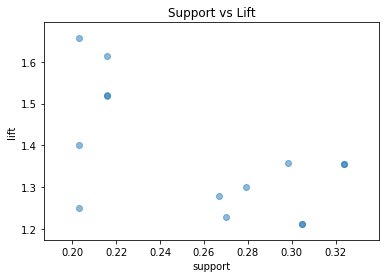

In [20]:
plt.scatter(rules['support'], rules['lift'], alpha=0.5)
plt.xlabel('support')
plt.ylabel('lift')
plt.title('Support vs Lift')
plt.show()

### Lift vs Confidence

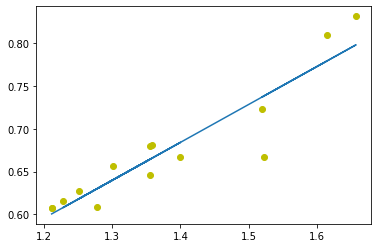

In [21]:
fit = np.polyfit(rules['lift'], rules['confidence'], 1)
fit_fn = np.poly1d(fit)
plt.plot(rules['lift'], rules['confidence'], 'yo', rules['lift'], 
 fit_fn(rules['lift']))

## Real groceries dataset
The dataset is the result of preprocessing of a real dataset on grocery transactions from the arules R library. It contains actual transactions at a grocery outlet over 30 days. 

In [36]:
data_file = "../../data_ml_2020/groceries_matrix.csv" 

In [37]:
df = pd.read_csv(data_file, sep=',') 
## Print top 5 rows 
df.head(5)

,rice,oil,tidbits,canned beer,instant coffee,sound storage medium,salt,curd cheese,turkey,cream,...,light bulbs,meat,nut snack,yogurt,shopping bags,beverages,cake bar,pudding powder,fruit/vegetable juice,hamburger meat
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [48]:
freq_items = apriori(df, min_support=0.02, use_colnames=True, verbose=1)
print(len(freq_items))
freq_items.head(10)

Processing 4 combinations | Sampling itemset size 4e 3
122


,support,itemsets
0,0.028063,(oil)
1,0.077682,(canned beer)
2,0.032944,(hygiene articles)
3,0.049619,(chocolate)
4,0.058566,(margarine)
5,0.023284,(cat food)
6,0.110524,(bottled water)
7,0.029893,(candy)
8,0.071683,(whipped/sour cream)
9,0.028368,(misc. beverages)


In [49]:
rules = association_rules(freq_items, metric="confidence", min_threshold=0.02)
print(len(rules))
rules.head(10)

134


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(margarine),(whole milk),0.058566,0.255516,0.024199,0.413194,1.617098,0.009235,1.268706
1,(whole milk),(margarine),0.255516,0.058566,0.024199,0.094708,1.617098,0.009235,1.039922
2,(bottled water),(whole milk),0.110524,0.255516,0.034367,0.310948,1.216940,0.006126,1.080446
3,(whole milk),(bottled water),0.255516,0.110524,0.034367,0.134501,1.216940,0.006126,1.027703
4,(bottled water),(rolls/buns),0.110524,0.183935,0.024199,0.218951,1.190373,0.003870,1.044832
5,(rolls/buns),(bottled water),0.183935,0.110524,0.024199,0.131564,1.190373,0.003870,1.024228
6,(bottled water),(other vegetables),0.110524,0.193493,0.024809,0.224471,1.160101,0.003424,1.039945
7,(other vegetables),(bottled water),0.193493,0.110524,0.024809,0.128219,1.160101,0.003424,1.020297
8,(soda),(bottled water),0.174377,0.110524,0.028978,0.166181,1.503577,0.009705,1.066750
9,(bottled water),(soda),0.110524,0.174377,0.028978,0.262190,1.503577,0.009705,1.119017


The network graph below shows associations between selected items. Larger circles imply higher support, while red circles imply higher lift:

<figure>
    <img src="images/association-rules-network-graph2.png" title="Associations between selected items. Visualized using the arulesViz R library.">
    <figcaption>Fig.1 - Associations between selected items. Visualized using the arulesViz R library.</figcaption>
</figure>

The figure is from this  [post](https://www.kdnuggets.com/2016/04/association-rules-apriori-algorithm-tutorial.html).

View this [post](https://www.kdnuggets.com/2016/04/association-rules-apriori-algorithm-tutorial.html)

https://rpubs.com/aru0511/GroceriesDatasetAssociationAnalysis